# Problem Statement:
Investigate the factors influencing sales performance in a XYZ company by analyzing historical sales data. The goal is to improve sales revenue and profitability through data-driven insights and actionable recommendations.

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data

sales_data = pd.read_csv(r"C:\Users\Harrison\Downloads\sales_data.csv")

# Display the first few rows of the dataset
sales_data.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


The dataset includes the following columns:

- transaction_id: Unique identifier for each transaction.
- timestamp: Date and time of the transaction.
- product_id: Unique identifier for each product.
- category: Product category.
- customer_type: Type of customer (e.g., gold, standard, premium, basic).
- unit_price: Price per unit of the product.
- quantity: Quantity of the product purchased.
- total: Total amount for the transaction.
- payment_type: Payment method (e.g., e-wallet, debit card).

To proceed, we'll explore the data to identify any trends or patterns and perform some statistical analysis to investigate the factors influencing sales performance.

### Steps to Analyze the Data:
- Data Cleaning: Check for missing values, duplicates, and any inconsistencies in the data.
- Descriptive Analysis: Get summary statistics for numerical columns and frequency distribution for categorical columns.
- Time Series Analysis: Analyze sales trends over time.
- Customer Analysis: Analyze sales performance by customer type.
- Product Analysis: Analyze sales performance by product and category.
- Payment Type Analysis: Investigate the impact of payment types on sales.
- Correlation Analysis: Identify correlations between different variables.

### Let's start with data cleaning and descriptive analysis.

In [3]:
# Data Cleaning
# Check for missing values
missing_values = sales_data.isnull().sum()

# Check for duplicates
duplicates = sales_data.duplicated().sum()

# Descriptive Statistics
summary_stats = sales_data.describe(include='all')

missing_values, duplicates, summary_stats

(Unnamed: 0        0
 transaction_id    0
 timestamp         0
 product_id        0
 category          0
 customer_type     0
 unit_price        0
 quantity          0
 total             0
 payment_type      0
 dtype: int64,
 0,
          Unnamed: 0                        transaction_id  \
 count   7829.000000                                  7829   
 unique          NaN                                  7829   
 top             NaN  a1c82654-c52c-45b3-8ce8-4c2a1efe63ed   
 freq            NaN                                     1   
 mean    3914.000000                                   NaN   
 std     2260.181962                                   NaN   
 min        0.000000                                   NaN   
 25%     1957.000000                                   NaN   
 50%     3914.000000                                   NaN   
 75%     5871.000000                                   NaN   
 max     7828.000000                                   NaN   
 
                   timest

In [4]:
summary_stats = sales_data.describe(include='all')

summary_stats

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
count,7829.000000,7829,7829,7829,7829,7829,7829.000000,7829.000000,7829.000000,7829
unique,NaN,7829,7738,300,22,5,NaN,NaN,NaN,4
top,NaN,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 19:32:20,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,fruit,non-member,NaN,NaN,NaN,cash
freq,NaN,1,2,114,998,1601,NaN,NaN,NaN,2027
mean,3914.000000,NaN,NaN,NaN,NaN,NaN,7.819480,2.501597,19.709905,NaN
std,2260.181962,NaN,NaN,NaN,NaN,NaN,5.388088,1.122722,17.446680,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,0.190000,1.000000,0.190000,NaN
25%,1957.000000,NaN,NaN,NaN,NaN,NaN,3.990000,1.000000,6.570000,NaN
50%,3914.000000,NaN,NaN,NaN,NaN,NaN,7.190000,3.000000,14.970000,NaN
75%,5871.000000,NaN,NaN,NaN,NaN,NaN,11.190000,4.000000,28.470000,NaN


### Data Cleaning and Descriptive Analysis Results
- Missing Values: There are no missing values in the dataset.
- Duplicates: There are no duplicate rows in the dataset.

Descriptive Statistics:
- The dataset contains 7829 transactions.
- Each transaction is uniquely identified by transaction_id.
- The most common product category is fruit with 998 transactions.
- The dataset includes five customer types, with non-member being the most frequent.
- The average unit price is approximately 7.82, ranging from $0.19 to 23.99.
- The quantity of products purchased per transaction ranges from 1 to 4.
- The total amount for transactions ranges from 0.19 to 95.96.
- The most common payment type is cash, with 2027 transactions.

In [5]:
sales_data.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


### Data Preprocessing

In [6]:
# Drop 'unnamed' column and rename 'total' to 'sales'

sales_data.drop('Unnamed: 0', axis = 1, inplace = True)

sales_data.rename(columns = {'total': 'sales'}, inplace = True)

# view few rows
sales_data.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,sales,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [7]:
# Convert the 'timestamp' to datetime data type

sales_data['timestamp'] = pd.to_datetime(sales_data['timestamp'])

# check the info
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   sales           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


In [8]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   sales           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


In [9]:
# Extract date and time features
sales_data['date'] = sales_data['timestamp'].dt.date
sales_data['month'] = sales_data['timestamp'].dt.to_period('M')
sales_data['day'] = sales_data['timestamp'].dt.to_period('D')
sales_data['hour'] = sales_data['timestamp'].dt.hour

# Aggregate sales by month
monthly_sales = sales_data.groupby('month')['sales'].sum().reset_index()

# Aggregate sales by day
daily_sales = sales_data.groupby('day')['sales'].sum().reset_index()

# Aggregate sales by hour
hourly_sales = sales_data.groupby('hour')['sales'].sum().reset_index()

monthly_sales, daily_sales, hourly_sales

(     month      sales
 0  2022-03  154308.85,
           day     sales
 0  2022-03-01  22183.96
 1  2022-03-02  22500.79
 2  2022-03-03  21405.47
 3  2022-03-04  22262.64
 4  2022-03-05  21803.03
 5  2022-03-06  21865.79
 6  2022-03-07  22287.17,
     hour     sales
 0      9  13904.25
 1     10  13346.56
 2     11  14997.63
 3     12  14359.87
 4     13  13590.22
 5     14  13759.12
 6     15  13563.79
 7     16  14475.48
 8     17  14010.43
 9     18  14347.75
 10    19  13953.75)

Monthly Sales:
- The total sales for March 2022 is $154,308.85.

Daily Sales:
- Sales vary daily, with the highest total sales on March 2, 2022 ($22,500.79) and the lowest on March 3, 2022 (21,405.47).

Hourly Sales:
- Sales are distributed relatively evenly throughout the day, with slight peaks at 11 AM (14,997.63) and 4 PM ($14,475.48).

### Data Validation

In [11]:
# Extract the numerical columns

num_vars = sales_data.select_dtypes(include = ['float', 'int']).columns.tolist()

num_vars

['unit_price', 'quantity', 'sales', 'hour']

In [12]:
# Value counts for the numerical columns

for column in num_vars:
  print(sales_data[column].value_counts())

unit_price
3.99     374
4.99     374
1.49     321
0.49     306
8.19     272
        ... 
21.99     17
20.99     17
23.99     13
17.99     12
20.19     11
Name: count, Length: 64, dtype: int64
quantity
1    1979
4    1976
3    1954
2    1920
Name: count, dtype: int64
sales
14.97    104
3.99     103
11.97     98
4.99      94
19.96     94
        ... 
60.57      2
47.98      2
17.99      2
20.19      1
35.98      1
Name: count, Length: 256, dtype: int64
hour
11    738
16    730
18    727
10    723
12    721
9     718
19    709
14    702
17    699
13    693
15    669
Name: count, dtype: int64


In [13]:
# Extract the categorical columns

cat_vars = sales_data.select_dtypes(include = ['object', 'category']).columns.tolist()
cat_vars

['transaction_id',
 'product_id',
 'category',
 'customer_type',
 'payment_type',
 'date']

In [14]:
# Value counts for the categorical columns
for column in cat_vars:
  print(sales_data[column].value_counts())

transaction_id
a1c82654-c52c-45b3-8ce8-4c2a1efe63ed    1
6532e258-95fd-4eb5-8c67-2bfb879a8fec    1
6fce2af3-47a0-4755-99c9-0cefb5ab6f41    1
6476e388-3990-471f-b415-3ee59ae18832    1
10afe89b-c45b-49a2-b0be-dec89a4c3f80    1
                                       ..
a9abe5ac-99d5-4d8b-bbbd-c2a207642849    1
6b0b23e8-412b-4665-8cc4-3e37f0d9e195    1
711a4162-1985-4f5a-94ca-137cfacaeadf    1
7d1e9010-dbaf-4770-a467-f31477910f7a    1
afd70b4f-ee21-402d-8d8f-0d9e13c2bea6    1
Name: count, Length: 7829, dtype: int64
product_id
ecac012c-1dec-41d4-9ebd-56fb7166f6d9    114
80da8348-1707-403f-8be7-9e6deeccc883    109
0ddc2379-adba-4fb0-aa97-19fcafc738a1    108
7c55cbd4-f306-4c04-a030-628cbe7867c1    104
3bc6c1ea-0198-46de-9ffd-514ae3338713    101
                                       ... 
49f7d4a9-713a-4824-b378-aebb33ff8b2f      5
a8fab83a-16d4-4db0-a83a-f824ecd8604a      5
c8de27d0-2c44-4b5a-b178-59c45d054ccb      5
5adfc643-aa8e-4140-b2c3-98a946444632      5
ec0bb9b5-45e3-4de8-963d-e92aa91a

### Exploratory Data Analysis (EDA)

- Exploratory Data Analysis (EDA) is a crucial step in any data analysis project. It involves summarizing the main characteristics of the data and visualizing them to gain insights. 

#### 1. Time Series Analysis: Analyze sales trends over different time periods.

**Visualizing the Trends**

Let's create visualizations to understand these trends better.

In [15]:
daily_sales

,day,sales
0,2022-03-01,22183.96
1,2022-03-02,22500.79
2,2022-03-03,21405.47
3,2022-03-04,22262.64
4,2022-03-05,21803.03
5,2022-03-06,21865.79
6,2022-03-07,22287.17


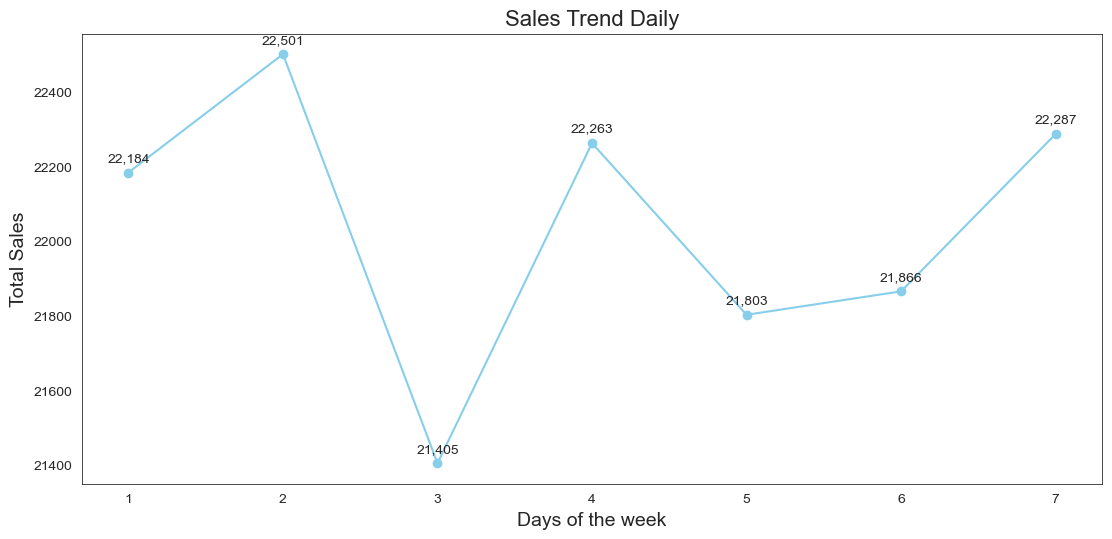

In [57]:
# Group the data by year and sum the sales
sales_month = sales_data.groupby(sales_data['timestamp'].dt.day)['sales'].sum()

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Set the background color to white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Plot the line chart
ax.plot(sales_month.index, sales_month.values, color="skyblue", marker='o')

# Add labels and title
ax.set_title('Sales Trend Daily', fontsize=16)
ax.set_xlabel('Days of the week', fontsize=14)
ax.set_ylabel('Total Sales', fontsize=14)

# Format the x-axis ticks as integers
ax.xaxis.set_major_formatter('{x:.0f}')

# Add data labels
for x, y in zip(sales_month.index, sales_month.values):
    ax.annotate(f'{y:,.0f}', (x, y), textcoords='offset points', xytext=(0, 8), ha='center')

# Remove the grid lines
ax.grid(False)

# Add border to the chart
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.5)

# Adjust the spacing
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.15)

# Display the plot
plt.show()


Sales vary daily, with the highest total sales on March 2, 2022 (22,500.79) and the lowest on March 3, 2022 ($21,405.47)

In [26]:
hourly_sales

,hour,sales
0,9,13904.25
1,10,13346.56
2,11,14997.63
3,12,14359.87
4,13,13590.22
5,14,13759.12
6,15,13563.79
7,16,14475.48
8,17,14010.43
9,18,14347.75


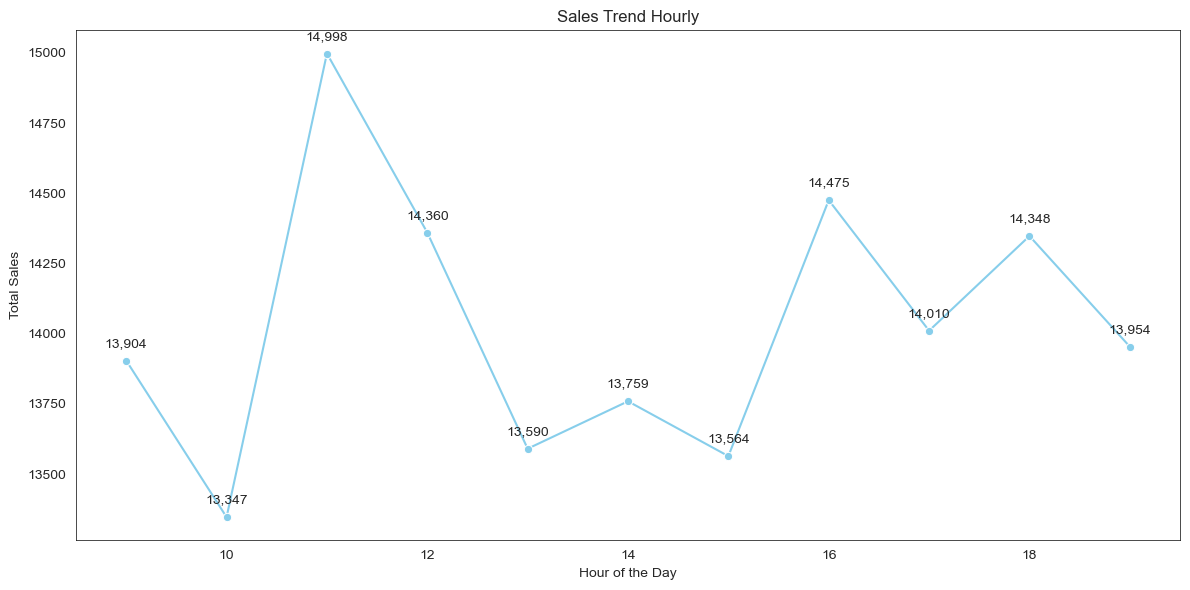

In [54]:
# Plot hourly sales
fig, ax = plt.subplots(figsize=(12, 6))

# Set the background color to white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

sns.lineplot(data=hourly_sales, x='hour', y='sales', marker='o', color="skyblue")
plt.title('Sales Trend Hourly')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')

# Format the x-axis ticks as integers
ax.xaxis.set_major_formatter('{x:.0f}')

# Add data labels
for x, y in zip(hourly_sales['hour'], hourly_sales['sales']):
    ax.annotate(f'{y:,.0f}', (x, y), textcoords='offset points', xytext=(0, 10), ha='center')

# Remove the grid lines
ax.grid(False)

# Add border to the chart
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.5)
    
# Adjust the spacing
plt.tight_layout()

plt.show()

Sales are distributed relatively evenly throughout the day, with slight peaks at 11 AM (14,997.63) and 4 PM ($14,475.48)

#### 2. Customer Analysis: Analyze sales performance by customer type

In [17]:
sales_data['customer_type'].value_counts()

customer_type
non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: count, dtype: int64

In [18]:
# Aggregate sales by customer type
customer_sales = sales_data.groupby('customer_type')['sales'].sum().reset_index()
customer_sales


,customer_type,sales
0,basic,29569.16
1,gold,29939.99
2,non-member,31755.24
3,premium,31655.68
4,standard,31388.78


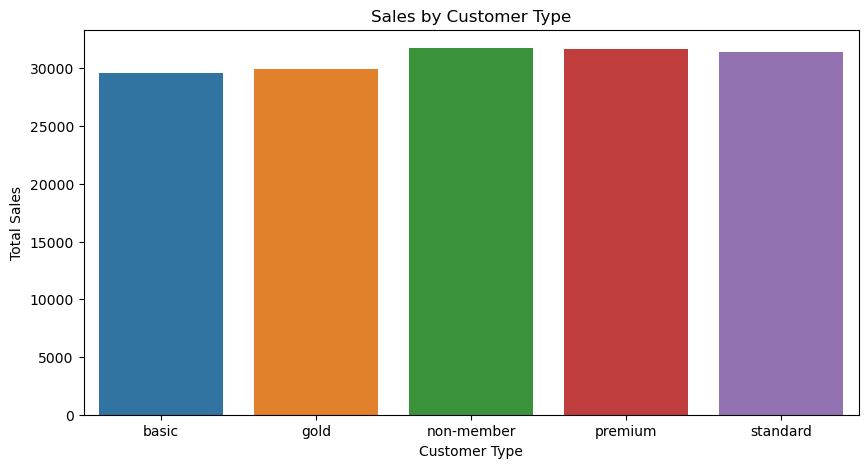

In [19]:
# Aggregate sales by customer type

data=sales_by_customer_type = sales_data.groupby('customer_type')['sales'].sum().reset_index()

# Plot customer type sales
plt.figure(figsize=(10, 5))
sns.barplot(data=sales_by_customer_type, x='customer_type', y='sales')
plt.title('Sales by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.show()


Based on the visualisation, the sales generated by the different customer types appear almost evenly distributed. However,  the non-member has the highest sales.

 #### 3. Product Analysis: Analyze sales performance by product category.

In [20]:
# Aggregate sales by category
category_sales = sales_data.groupby('category')['sales'].sum().reset_index()
category_sales 


,category,sales
0,baby products,6704.97
1,baked goods,8348.21
2,baking,3451.82
3,beverages,9930.64
4,canned foods,6743.48
5,cheese,6861.27
6,cleaning products,9483.75
7,condiments and sauces,3111.60
8,dairy,7551.60
9,frozen,6590.10


In [21]:
sales_data['category'].value_counts()

category
fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: count, dtype: int64

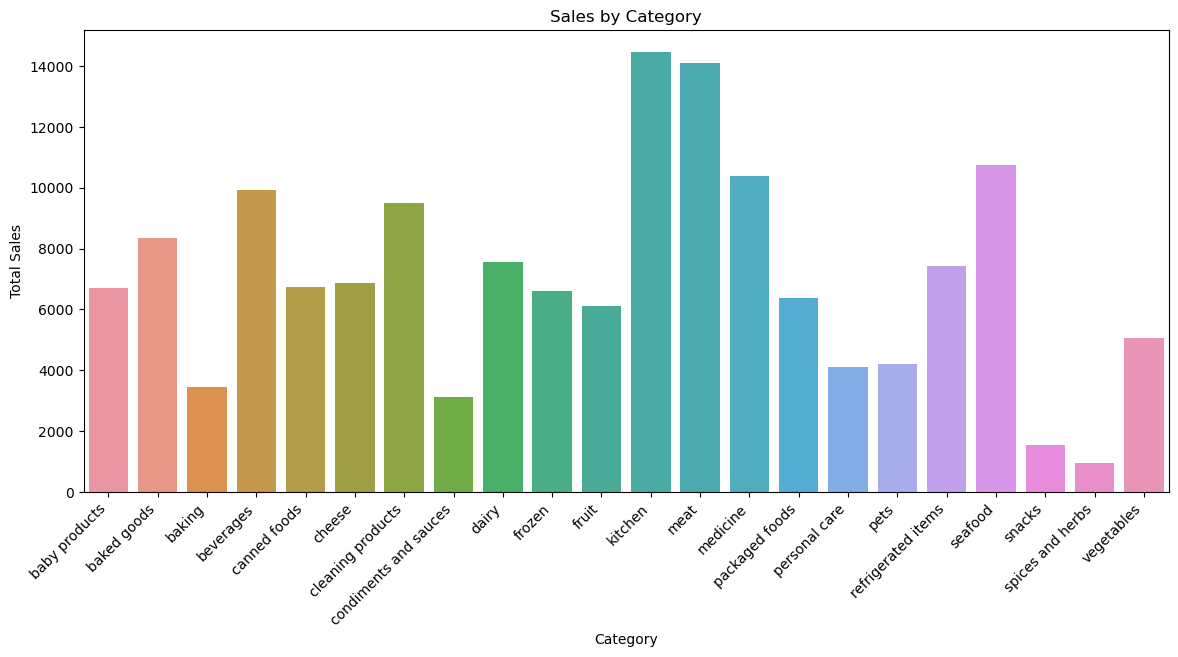

In [22]:
# Visualising

plt.figure(figsize=(14, 6))
sns.barplot(data=category_sales, x='category', y='sales')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()


kitchen and meet product category appears to be the products with the highest sales. While snacks and spices & herbs are the least

From our analysis, we can see that fruits and vegetables are the most ordered product category

#### 4. Payment Type Analysis: Investigate the impact of payment types on sales.

In [23]:
# Aggregate sales by payment type
sales_by_payment_method = sales_data.groupby('payment_type')['sales'].sum().reset_index()
sales_by_payment_method

,payment_type,sales
0,cash,41287.31
1,credit card,39309.52
2,debit card,37010.67
3,e-wallet,36701.35


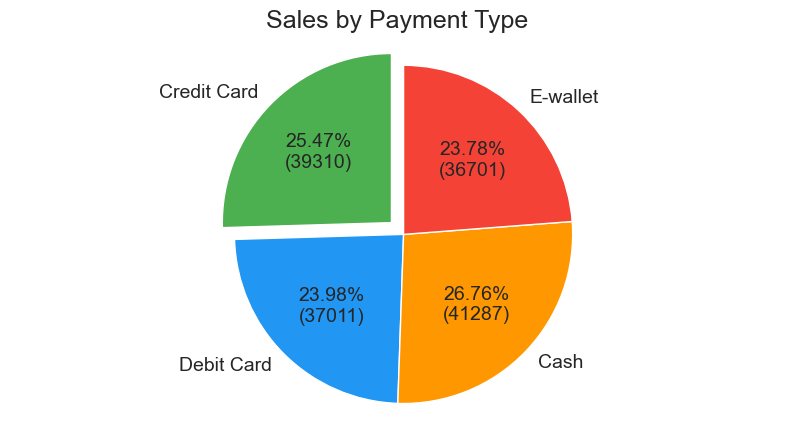

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example data for sales by payment method
sales_by_payment_method = {
    'payment_type': ['Credit Card', 'Debit Card', 'Cash', 'E-wallet'],
    'sales': [39309.52, 37010.67, 41287.31, 36701.35]
}
sales_by_payment_method = pd.DataFrame(sales_by_payment_method)

# Set the style for the plot
sns.set_style('darkgrid')

# Pie chart customization variables
explode = (0.1, 0, 0, 0)  # Explode the first slice
colors = ['#4CAF50', '#2196F3', '#FF9800', '#F44336']  # Different colors for each slice

# Autopct formatting function
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_format

# Creating the pie chart
plt.figure(figsize=(10, 5))
plt.pie(sales_by_payment_method['sales'], explode=explode, labels=sales_by_payment_method['payment_type'], colors=colors, autopct=autopct_format(sales_by_payment_method['sales']), startangle=90, textprops={'fontsize': 14})
plt.title('Sales by Payment Type', fontsize=18)
plt.axis('equal')
plt.show()


The sales by payment method is almost evenly dirstributed among the different payment methods, however, the payment method with the highest sales is the cash method, closely followed by credit card.

#### 5. Correlation Analysis: Identify correlations between different variables.

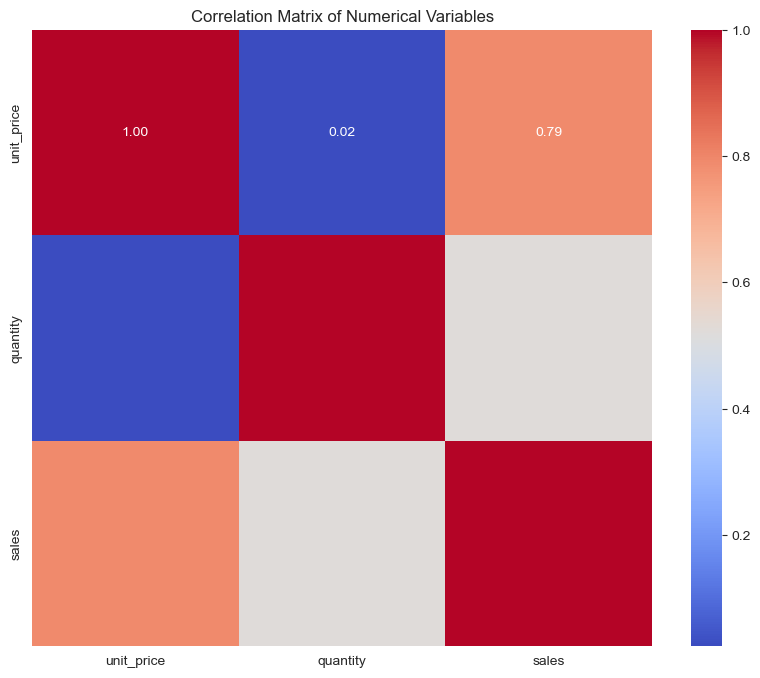

In [25]:
# Correlation matrix
numerical_data = sales_data.select_dtypes(include=['int64', 'float64'])                                                      
correlation_matrix = numerical_data.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

There is a strong positive correlation between unit_price and sales suggests that the unit price is a significant factor influencing total sales. Since unit price strongly influences total sales, optimizing pricing strategies might be an effective way to boost sales revenue.

### Business Recommendations

1. **Optimize Sales Timing and Staffing**
   - **Daily Sales Patterns**:
     - Identify days with the highest sales and align promotions, discounts, and special events on these days to maximize sales.
     - For days with lower sales, implement targeted marketing campaigns to drive traffic.
   - **Hourly Sales Distribution**:
     - Increase staffing during peak sales hours to improve customer service and reduce wait times.
     - Schedule inventory restocking during off-peak hours to ensure product availability without disrupting customer experience.

2. **Enhance Customer Membership Programs**
   - **Non-Member Sales Dominance**:
     - Develop marketing strategies to convert non-members into members by offering exclusive benefits such as discounts, loyalty points, or special promotions.
     - Create targeted communication campaigns to highlight the advantages of membership and encourage sign-ups.
   - **Comparable Performance Among Membership Tiers**:
     - Analyze and understand the unique needs and preferences of each membership tier to tailor marketing efforts.
     - Offer tier-specific promotions to incentivize purchases and increase overall sales across all membership levels.

3. **Product Category Management**
   - **High-Performing Categories**:
     - Focus on maintaining high stock levels for top-performing categories like kitchen and meat to meet demand and avoid stockouts.
     - Leverage the popularity of these categories in marketing campaigns and cross-promotions with other products.
   - **Low-Performing Categories**:
     - Conduct a detailed analysis of low-performing categories (e.g., spices and herbs, pet food, snacks) to identify the reasons for lower sales.
     - Consider product bundling, discounts, or enhanced marketing efforts to boost sales in these categories.
     - Evaluate the possibility of phasing out underperforming products and replacing them with new, in-demand items.

4. **Payment Method Optimization**
   - **Balanced Distribution Across Payment Types**:
     - Ensure all payment options (Credit Card, Debit Card, E-wallet, and Cash) are seamlessly integrated and functional at all times to accommodate customer preferences.
     - Promote digital payment methods (E-wallet and Debit Card) by offering exclusive discounts or rewards for using these options.
   - **Cash Dominates Slightly**:
     - Maintain efficient cash handling processes and ensure adequate cash registers and change availability during peak hours to avoid delays.
     - Educate customers on the benefits of digital payments to gradually shift preferences and reduce cash handling costs.

5. **Pricing Strategy and Sales Correlation**
   - **Strong Positive Correlation Between Unit Price and Sales**:
     - Implement a dynamic pricing strategy to optimize revenue, adjusting prices based on demand, competition, and customer behavior.
     - Consider premium pricing for high-demand products to maximize sales revenue.
   - **Minimal Correlation Between Quantity and Sales**:
     - Focus on marketing strategies that highlight product value and benefits rather than relying solely on bulk sales.
     - Offer value-added services or product enhancements to justify higher prices and drive sales revenue.

By implementing these recommendations, XYZ Company can effectively leverage the insights gained from the sales data analysis to enhance operational efficiency, improve customer satisfaction, and drive overall business growth.